# Hente CSV fra SSB API til Pandas
## Konjunkturtendensene (KT) prognoser 
### Henter datasett  [Utvalgte prognoser](https://data.ssb.no/api/v0/dataset/934516) som CSV  fra SSBs API:ferdige datasett

In [1]:
# Importerer Python pandas for å kunne lage dataframe
import pandas as pd

pd.read_csv() henter innholdet fra API-et og legger det i data. 
De norske datasettene her er semikolonseparert med komma som desimaltegn.
CSV er ikke UTF-8, så vi må angi parameter encoding for å få æøå riktig. 

In [22]:
df = pd.read_csv("https://data.ssb.no/api/v0/dataset/934516.csv?lang=no", sep=';', decimal=',', encoding = "ISO-8859-1" )

Sjekker at datatypen Pandas dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   år                                                                                             40 non-null     int64  
 1   statistikkvariabel                                                                             40 non-null     object 
 2   12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser, etter år og statistikkvariabel  40 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


12 først linjer av datasettet

In [24]:
df.head(12)

,år,statistikkvariabel,"12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser, etter år og statistikkvariabel"
0,2020,Bruttonasjonalprodukt,-4.0
1,2020,BNP Fastlands-Norge,-5.5
2,2020,Sysselsatte personer,-2.3
3,2020,Arbeidsledighetsrate (nivå),6.3
4,2020,Årslønn,2.0
5,2020,Konsumprisindeksen (KPI),1.2
6,2020,KPI-JAE,2.8
7,2020,Boligpris,-2.0
8,2020,Pengemarkedsrente (nivå),1.1
9,2020,Importveid kronekurs (44 land),11.4


Evt. enkel endring til datoformat. Ikke strengt nødvendig. Ta vekk kommentaren når du skjønner hva som skjer.  

In [25]:
#df['år'] = pd.to_datetime(df['år'], format='%Y', errors='coerce')

Lage linjediagrammer der vi angir x og y aksen, med Pandas plot

statistikkvariabel
Arbeidsledighetsrate (nivå)       AxesSubplot(0.125,0.125;0.775x0.755)
BNP Fastlands-Norge               AxesSubplot(0.125,0.125;0.775x0.755)
Boligpris                         AxesSubplot(0.125,0.125;0.775x0.755)
Bruttonasjonalprodukt             AxesSubplot(0.125,0.125;0.775x0.755)
Importveid kronekurs (44 land)    AxesSubplot(0.125,0.125;0.775x0.755)
KPI-JAE                           AxesSubplot(0.125,0.125;0.775x0.755)
Konsumprisindeksen (KPI)          AxesSubplot(0.125,0.125;0.775x0.755)
Pengemarkedsrente (nivå)          AxesSubplot(0.125,0.125;0.775x0.755)
Sysselsatte personer              AxesSubplot(0.125,0.125;0.775x0.755)
Årslønn                           AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

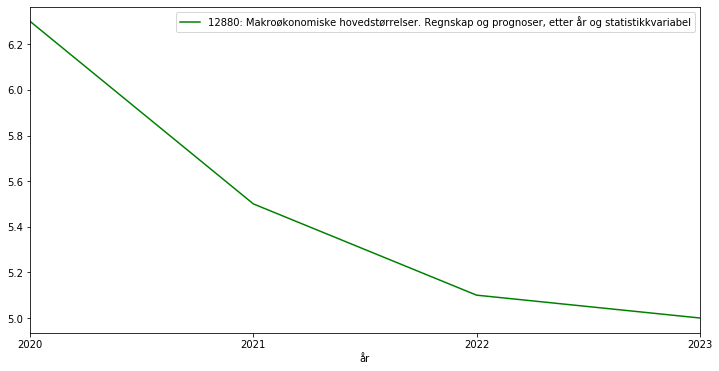

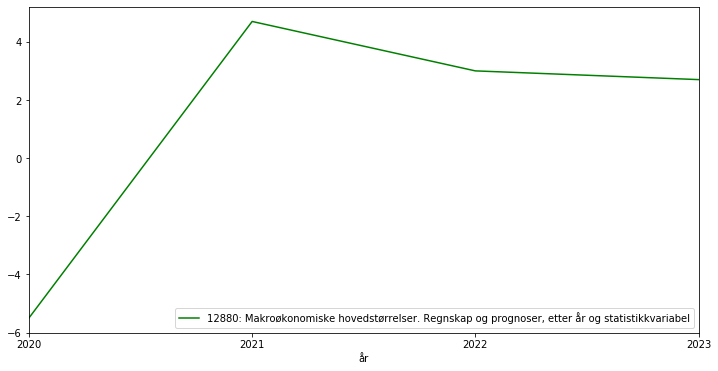

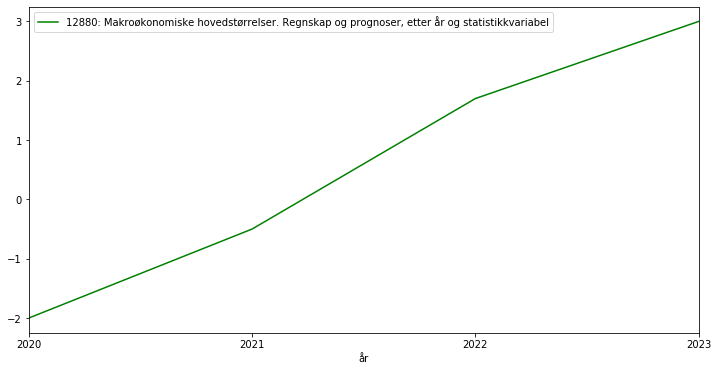

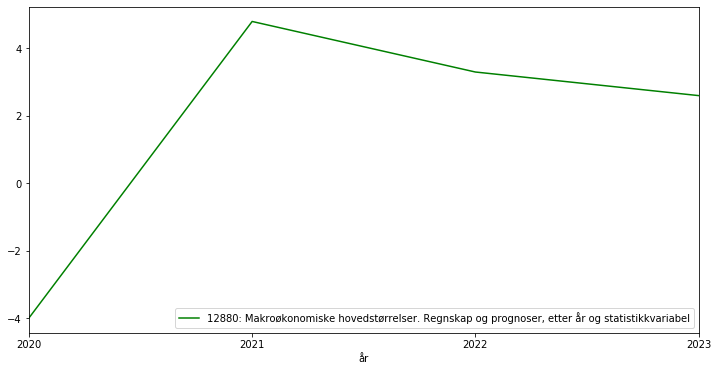

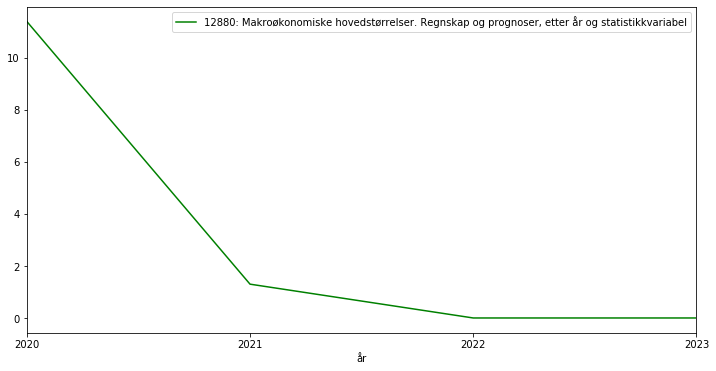

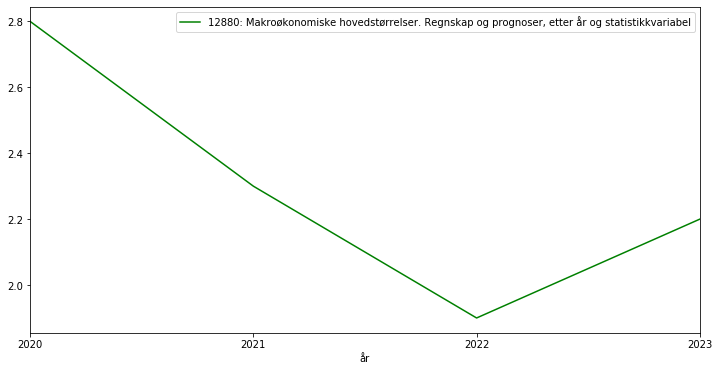

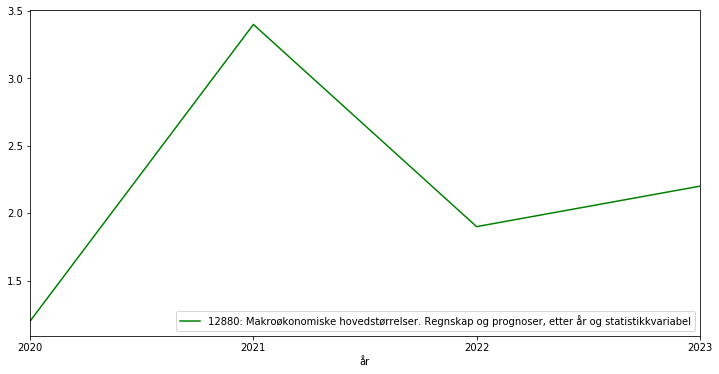

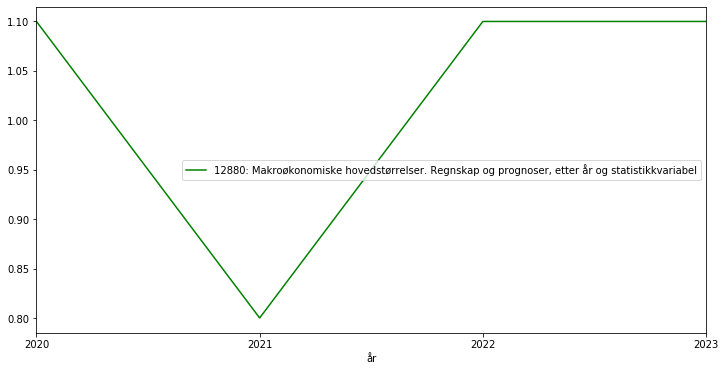

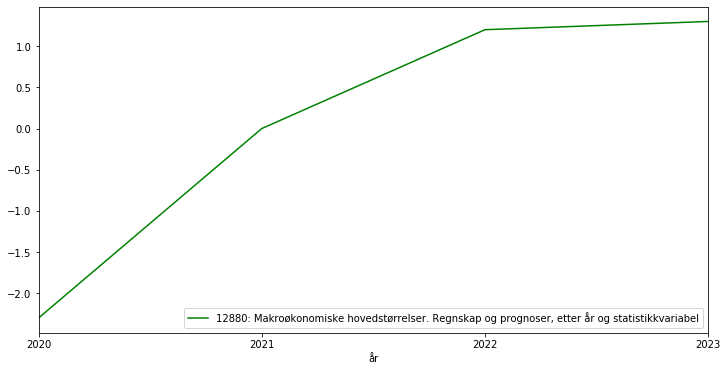

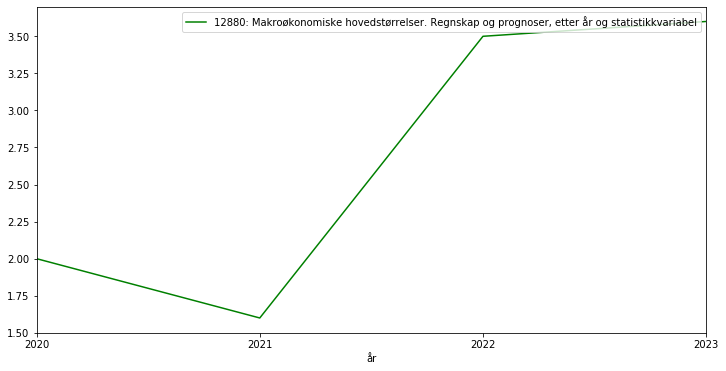

In [26]:
df.groupby('statistikkvariabel').plot(x='år', y='12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser, etter år og statistikkvariabel', figsize=(12, 6), color ='g')

For å få alle linjene i en figur i Pandas plot er det best å pivotere tabellen. Lager en ny dataframe df2, med år som index.

In [27]:
df2 = df.pivot(index='år', columns='statistikkvariabel', 
               values='12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser, etter år og statistikkvariabel')

df2 er 'wide' i stedet for 'long'

In [28]:
df2

statistikkvariabel,Arbeidsledighetsrate (nivå),BNP Fastlands-Norge,Boligpris,Bruttonasjonalprodukt,Importveid kronekurs (44 land),KPI-JAE,Konsumprisindeksen (KPI),Pengemarkedsrente (nivå),Sysselsatte personer,Årslønn
år,,,,,,,,,,
2020-01-01,6.3,-5.5,-2.0,-4.0,11.4,2.8,1.2,1.1,-2.3,2.0
2021-01-01,5.5,4.7,-0.5,4.8,1.3,2.3,3.4,0.8,0.0,1.6
2022-01-01,5.1,3.0,1.7,3.3,0.0,1.9,1.9,1.1,1.2,3.5
2023-01-01,5.0,2.7,3.0,2.6,0.0,2.2,2.2,1.1,1.3,3.6


Pandas plot av df2 med størrelse, datamarkør og tittel

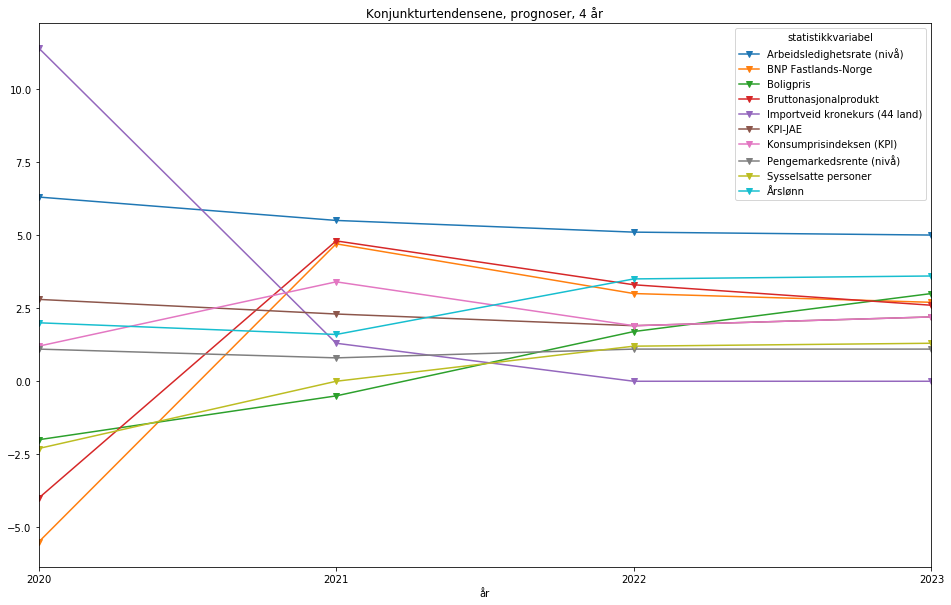

In [29]:
df2.plot(figsize=(16, 10), marker='v', title='Konjunkturtendensene, prognoser, 4 år')

### Plot med 'up-and-coming' [Plotly](https://plotly.com/python/). Her bruker jeg det enklere Plotly express

In [30]:
import plotly.express as px  # px her er standard angivelse for Plotly express. Har ikke noe å gjøre med Statistikkbank px

In [31]:
fig = px.line(df, x='år', y='12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser, etter år og statistikkvariabel')

Merk at her er input den opprinnelig df, som er 'long'. Det blir ikke bra, uten gruppering.

In [32]:
fig.show()

Plotly Express har argumentet 'line_group', for gruppering. Her legger jeg også på tittel og tekst til y-aksen.

In [34]:
px.line(df, x=('år'), y='12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser, etter år og statistikkvariabel', 
              color='statistikkvariabel', 
              line_group='statistikkvariabel', 
              title='Konjunkturtendensene, utvalgte prognoser 4 år', 
              labels={'12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser, etter år og statistikkvariabel':'Endring / Nivå'})

Et tips til slutt: Prøv å benytte det rikere JSON-stat og biblioteket pyjstat framfor CSV. 